# Extract real demand data

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
orders = pd.read_csv(r'data\raw-data\orders.csv')
orders = orders[orders.type=='SALE']
orders = orders.drop(columns=['warehouse_id', 'promotion_id', 'promotion_level_id', 'user_id', 'customer_id', 'note', 'invoice_number', 'order_date'])
orders = orders[(orders.status=='ACCEPTED') | ((orders.status=='ACTIVE'))]
orders.head()

,id,created_at,updated_at,status,type,is_returned,accepted_at
0,0000192c-cb35-47e0-b4ba-c620e5191bec,2021-06-25 11:11:25.183250,2021-06-25 11:26:33.145290,ACCEPTED,SALE,0,2021-06-25 11:26:33.145290
1,00006f7b-19ad-4cfc-9ef6-4b79b8e3e88a,2021-03-19 11:29:34.177138,2021-03-19 11:29:34.177138,ACTIVE,SALE,0,NaN
2,0000a0fd-9c80-42ea-872f-0a108e610f0e,2021-02-24 10:43:18.255429,2021-02-24 10:43:18.255429,ACTIVE,SALE,0,NaN
4,000106a1-79a2-440c-9b51-ba59a2cdc6e8,2021-08-13 03:45:10.089879,2021-08-14 01:32:37.346609,ACCEPTED,SALE,0,2021-08-14 01:32:37.346585
5,00010f48-46a2-4e40-96df-c8d0f2dbfd08,2021-09-24 04:36:01.058500,2021-09-27 13:01:40.085249,ACCEPTED,SALE,0,2021-09-27 13:01:40.085236


In [4]:
demand_df = orders['created_at']

In [5]:
order_products = pd.read_csv(r'data\raw-data\order_products.csv')
order_products = order_products.loc[:,['quantity','product_id','order_id']]
order_products = order_products.rename(columns={'order_id': 'id'})
order_products.head()

,quantity,product_id,id
0,30,e25aad7c-7d24-4758-9588-2568d89c4ea6,1f975223-f8d4-43c2-ad21-2c903bfbdf65
1,30,e25aad7c-7d24-4758-9588-2568d89c4ea6,d9e7ee72-7bea-4526-ae6d-193e2d237adf
2,6,744e4fcd-7a49-11eb-b63f-d4bed94a7a6b,dd0894fb-549b-41fc-b574-74307af07b8b
3,8,c78a9a2e-f871-44f6-8aa3-ad7d279aac45,e46b96c5-f164-4a09-a867-9b52dd76cbec
4,30,baa7c9f9-215b-4c4b-837c-f40626f2f8b4,e072f71b-9e4c-4913-9ecb-3aea9a55b666


In [6]:
sales_df = orders.merge(order_products, how='left')
sales_df.head()

,id,created_at,updated_at,status,type,is_returned,accepted_at,quantity,product_id
0,0000192c-cb35-47e0-b4ba-c620e5191bec,2021-06-25 11:11:25.183250,2021-06-25 11:26:33.145290,ACCEPTED,SALE,0,2021-06-25 11:26:33.145290,3.0,744e5054-7a49-11eb-b63f-d4bed94a7a6b
1,00006f7b-19ad-4cfc-9ef6-4b79b8e3e88a,2021-03-19 11:29:34.177138,2021-03-19 11:29:34.177138,ACTIVE,SALE,0,NaN,10.0,05c3ea7c-1728-49b1-8940-76a6c43fd013
2,0000a0fd-9c80-42ea-872f-0a108e610f0e,2021-02-24 10:43:18.255429,2021-02-24 10:43:18.255429,ACTIVE,SALE,0,NaN,5.0,05c3ea7c-1728-49b1-8940-76a6c43fd013
3,000106a1-79a2-440c-9b51-ba59a2cdc6e8,2021-08-13 03:45:10.089879,2021-08-14 01:32:37.346609,ACCEPTED,SALE,0,2021-08-14 01:32:37.346585,30.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
4,00010f48-46a2-4e40-96df-c8d0f2dbfd08,2021-09-24 04:36:01.058500,2021-09-27 13:01:40.085249,ACCEPTED,SALE,0,2021-09-27 13:01:40.085236,16.0,a009c7ca-a331-4720-a449-b1c624958d51


In [7]:
total_product = sales_df.quantity.groupby(sales_df['product_id']).sum().sort_values()
total_product

product_id
9e833e99-b484-4c3f-961f-ab63bb50e799         15.0
7337c54f-585e-49bb-bac2-8767225f029f         32.0
e9060960-31fa-4aa1-ab68-f21c208ad753         41.0
a28cc5ba-42ce-4c0d-a8a1-5f336877eead         72.0
d5efe13d-4d49-427b-b004-32277490d017        159.0
030f6dd9-c046-4043-a0df-a40ae09620e9        331.0
074899f4-2740-4ab5-a093-2e657acfb2f7        752.0
8fd05cc7-5a11-4397-9717-a2fdaddc1781        915.0
baa66ed3-efa0-46b9-a18e-0a63d3557c96       1270.0
62d731e6-a80e-4938-9afb-c2992e3af42c       1412.0
c13576dd-f141-4021-8006-f6abf8168995       1828.0
84d999ba-c806-4151-915b-7b066ae2c3c1       1896.0
744e505b-7a49-11eb-b63f-d4bed94a7a6b       2567.0
744e504e-7a49-11eb-b63f-d4bed94a7a6b       3246.0
04afb738-eef0-4817-ab3f-255d6605cdf0       3817.0
e93a627c-cb08-4dff-9734-4f7ab55edadb       9301.0
6ea3be2b-e111-428f-9c41-0488e3a2a436      11337.0
87d3b77b-e5e0-4c84-a2e7-9c5f6203b827      12013.0
c78a9a2e-f871-44f6-8aa3-ad7d279aac45      13389.0
44b95495-85ad-4abb-a6dc-95681ad3d520   

In [8]:
PRODUCT_ID = 'e25aad7c-7d24-4758-9588-2568d89c4ea6'
sale_df = sales_df[(sales_df['product_id']==PRODUCT_ID) & (sales_df['is_returned']==0)]
sale_df

,id,created_at,updated_at,status,type,is_returned,accepted_at,quantity,product_id
3,000106a1-79a2-440c-9b51-ba59a2cdc6e8,2021-08-13 03:45:10.089879,2021-08-14 01:32:37.346609,ACCEPTED,SALE,0,2021-08-14 01:32:37.346585,30.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
5,00015819-2071-4878-b3b1-8ae92e7dfc53,2021-02-02 07:21:15.151122,2021-02-02 07:21:15.151301,ACTIVE,SALE,0,NaN,90.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
9,0001b15f-1172-49d6-a364-5af7d0eb6985,2020-10-09 07:37:10.000000,2020-10-09 07:37:10.000000,ACTIVE,SALE,0,NaN,150.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
13,0001ea42-16af-4f08-90ea-571189bc6980,2021-10-26 02:36:07.505432,2021-10-29 03:16:13.619587,ACCEPTED,SALE,0,2021-10-29 03:16:13.619566,60.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
15,00022967-6b3b-470f-bd69-13b8c52150aa,2021-08-12 09:49:54.781010,2021-08-13 02:00:18.065495,ACCEPTED,SALE,0,2021-08-13 02:00:18.065479,30.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
...,...,...,...,...,...,...,...,...,...
295033,ffefba47-522a-4787-94fd-572fa9016f37,2021-10-15 09:04:18.433936,2021-10-18 03:11:36.615616,ACCEPTED,SALE,0,2021-10-18 03:11:36.615599,30.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
295038,fff0527e-361c-4c62-a137-8070fb265e0b,2021-08-21 10:30:38.319565,2021-08-23 03:54:59.530979,ACCEPTED,SALE,0,2021-08-23 03:54:59.482178,150.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
295046,fff2a439-2e7c-4b7b-8f3f-72f66e10c08c,2020-12-23 04:50:40.000000,2020-12-23 04:50:40.000000,ACTIVE,SALE,0,NaN,30.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
295055,fff49dc6-a6c1-4639-83fa-ae02a2920208,2021-04-10 10:05:52.975805,2021-04-10 10:05:52.975805,ACTIVE,SALE,0,NaN,30.0,e25aad7c-7d24-4758-9588-2568d89c4ea6


In [9]:
print(sale_df.quantity.describe())

count    32556.000000
mean        59.277245
std         79.492106
min       -150.000000
25%         30.000000
50%         30.000000
75%         60.000000
max       7500.000000
Name: quantity, dtype: float64


In [10]:
sale_df = sale_df.set_index('created_at')
sale_df.index = pd.to_datetime(sale_df.index)
sale_df.head()

,id,updated_at,status,type,is_returned,accepted_at,quantity,product_id
created_at,,,,,,,,
2021-08-13 03:45:10.089879,000106a1-79a2-440c-9b51-ba59a2cdc6e8,2021-08-14 01:32:37.346609,ACCEPTED,SALE,0,2021-08-14 01:32:37.346585,30.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
2021-02-02 07:21:15.151122,00015819-2071-4878-b3b1-8ae92e7dfc53,2021-02-02 07:21:15.151301,ACTIVE,SALE,0,NaN,90.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
2020-10-09 07:37:10.000000,0001b15f-1172-49d6-a364-5af7d0eb6985,2020-10-09 07:37:10.000000,ACTIVE,SALE,0,NaN,150.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
2021-10-26 02:36:07.505432,0001ea42-16af-4f08-90ea-571189bc6980,2021-10-29 03:16:13.619587,ACCEPTED,SALE,0,2021-10-29 03:16:13.619566,60.0,e25aad7c-7d24-4758-9588-2568d89c4ea6
2021-08-12 09:49:54.781010,00022967-6b3b-470f-bd69-13b8c52150aa,2021-08-13 02:00:18.065495,ACCEPTED,SALE,0,2021-08-13 02:00:18.065479,30.0,e25aad7c-7d24-4758-9588-2568d89c4ea6


In [11]:
week_sampling = sale_df.resample('W').sum()
print(week_sampling.quantity.values)
print('describe:\n', week_sampling.quantity.describe())

[ 9780. 20320. 22180. 30795. 29110. 30710. 35589. 27300. 33130. 63285.
 51845. 53696. 39460. 21318. 15050. 11810.  5436.  4663.  8364. 17560.
 21682. 32857. 47534.  9237. 35477. 66085. 48719. 50151. 40798. 21209.
 30892. 22028. 14695. 13074. 17900. 14433. 14734. 11281. 12128. 10965.
 10616. 16106. 11619. 21162. 15455. 20106. 28768. 27329. 34222. 50178.
 41385. 44383. 44730. 71980. 70730. 62515. 63169. 69013. 55678. 56907.
 46499.]
describe:
 count       61.000000
mean     31636.557377
std      18955.892633
min       4663.000000
25%      15050.000000
50%      28768.000000
75%      46499.000000
max      71980.000000
Name: quantity, dtype: float64


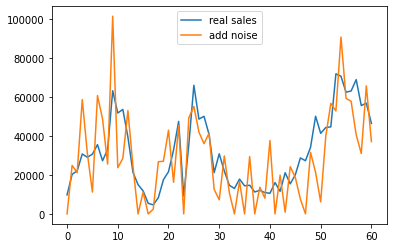

In [12]:
# add noise
# np.random.seed(42)
import matplotlib.pyplot as plt
plt.plot(week_sampling.quantity.values, label='real sales')
week_sampling['simulated_demand'] = [max(0, x+np.random.normal(0,18955)) for x in week_sampling.quantity.values]
plt.plot(week_sampling.simulated_demand.values, label='add noise')
plt.legend()
plt.show()

# Deep Q Network + NewVendor + real demand data

In [13]:
import numpy as np
import random
from collections import namedtuple, deque

# from model import QNetwork

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
    
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            # print('CHECK', action_values.shape)
            return np.argmax(action_values.cpu().data.numpy())
        else:
            # print('check', random.choice(np.arange(self.action_size)))
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # Get max predicted Q values (for next states) from target model
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [14]:
class QNetwork(nn.Module):
  def __init__(self, state_size, action_size, seed):
    """
    Build your freestyle QNetwork model.
    Params:
      - state_size (int): Dimension of each state 
      - action_size (int): Dimension of each action
      - seed (int): Random seed
    """
    super(QNetwork, self).__init__() ## calls __init__ method of nn.Module class
    self.seed = torch.manual_seed(seed)

    ### YOUR CODE HERE ###
    self.fc1 = nn.Linear(state_size, 64)
    self.fc2 = nn.Linear(64,128)
    self.fc3 = nn.Linear(128,256)
    self.fc4 = nn.Linear(256, action_size)

    ### END ###

  def forward(self, state):
    """
    Build a network that maps state -> action values.
    """
    ### YOUR CODE HERE ###
    x = F.leaky_relu(self.fc1(state))
    x = F.leaky_relu(self.fc2(x))
    x = F.leaky_relu(self.fc3(x))
    x = self.fc4(x)
    return x
    ### END ###

In [15]:
from or_gym.envs.classic_or.newsvendor import NewsvendorEnv
from gym import spaces
MAX_ORDERS = 73000 # dựa vào max order của sản phẩm
MIN_ORDERS = 4000 # dựa vào min order của sản phẩm
ACTION_SPACE_SIZE = 230 # số các action có thể lựa chọn
TRAINING_SIZE = 45 # 45/61 tuần
step_order = (MAX_ORDERS - MIN_ORDERS)//ACTION_SPACE_SIZE # step_order=300 => lượng nhập vào có thể là 4000, 4300, 4600, ...
action_list = np.linspace(MIN_ORDERS, MAX_ORDERS, ACTION_SPACE_SIZE+1, dtype=int) # list các lượng nhập có thể lựa chọn

# action ở trong env giờ có ý nghĩa là index của action_list

kwargs = {
        'lead_time' : 1, # số tuần kể từ lúc đặt hàng đến lúc nhận được hàng, lead_time > 0 có nghĩa là mô hình cần dự đoán trước được để ko bị thiếu hàng
        'max_inventory' : 35000, # dựa trên max tồn kho cho sản phẩn đó, lấy từ bảng inventory_logs
        'max_order_quantity' : ACTION_SPACE_SIZE, # độ lớn không gian hành động
        'step_limit' : TRAINING_SIZE, # step cho mỗi episode, tương ứng là số tuần huấn luyện
        'p_max' : 10,    # Max sale price
        'h_max' : 5  ,    # Max holding cost
        'k_max' : 10,     # Max lost sales penalty
        'mu_max' : 18955,   # độ lệch chuẩn của phân bố chuẩn - dựa độ lệch chuẩn của dữ liệu thực
        'gamma' : 1,      # Discount factor
}
env = NewsvendorEnv(**kwargs)


env.action_list = action_list

C:\Users\duytr\miniconda3\envs\aihack\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [16]:
agent = Agent(state_size=env.observation_space.shape[0], action_size=len(action_list), seed=42)

In [17]:
def DQN(n_episodes= 200, eps_start=0.9, eps_end = 0.01, eps_decay=0.995):
  """
  Deep Q-Learning
  Params:
    - n_episodes (int): maximum number of training epsiodes
    - eps_start (float): starting value of epsilon, for epsilon-greedy action selection
    - eps_end (float): minimum value of epsilon 
    - eps_decay (float): mutiplicative factor (per episode) for decreasing epsilon
  """
  scores = [] # list containing score from each episode
  scores_window = deque(maxlen=100)  # last 100 scores
  eps = eps_start
  for i_episode in range(n_episodes):
    state, score, done = env.reset(), 0, False
    env.demand_list = [max(0, x+np.random.normal(0,18955)) for x in week_sampling.quantity.values]
    step = 0
    while(done != True):
      action = agent.act(state, eps)
      # print(env.action_list[action])
      # print(action)
      next_state, reward, done, _ = env.step(action)
      agent.step(state, action, reward, next_state, done)
      ## above step decides whether we will train(learn) the network
      ## actor (local_qnetwork) or we will fill the replay buffer
      ## if len replay buffer is equal to the batch size then we will
      ## train the network or otherwise we will add experience tuple in our replay buffer.
      
      state = next_state
      score += reward
      # decrease the epsilon
      eps = max(eps*eps_decay, eps_end) 
      step +=1
      # print('\rEpisode {}\tScore {:.2f}'.format(i_episode, np.mean(score)), end="")

    scores.append(score)
    scores_window.append(score)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    
    # if np.mean(scores_window) >= 450.0:
    #   print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
    #   torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    #   break
  return scores

In [18]:
scores = DQN(n_episodes= 1000, eps_start=0.9, eps_end = 0.01, eps_decay=0.995)

Episode 999	Average Score: -931122000.94

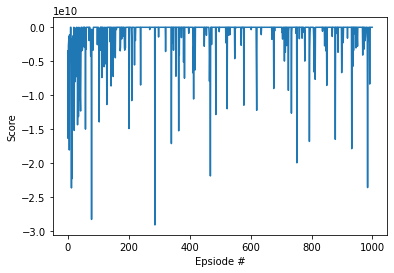

In [19]:
#plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)),scores)
plt.ylabel('Score')
plt.xlabel('Epsiode #')
plt.show()

# Double DQN + NewVendor + Real demand data - chưa thử nghiệm


In [ ]:
import gym
import torch
import numpy as np
from torch import nn
import random
import torch.nn.functional as F
import collections
from torch.optim.lr_scheduler import StepLR

"""
Implementation of Double DQN for gym environments with discrete action space.
"""

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

"""
The Q-Network has as input a state s and outputs the state-action values q(s,a_1), ..., q(s,a_n) for all n actions.
"""
class QNetwork(nn.Module):
    def __init__(self, action_dim, state_dim, hidden_dim):
        super(QNetwork, self).__init__()

        self.fc_1 = nn.Linear(state_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_3 = nn.Linear(hidden_dim, action_dim)

    def forward(self, inp):

        x1 = F.leaky_relu(self.fc_1(inp))
        x1 = F.leaky_relu(self.fc_2(x1))
        x1 = self.fc_3(x1)

        return x1


"""
If the observations are images we use CNNs.
"""
class QNetworkCNN(nn.Module):
    def __init__(self, action_dim):
        super(QNetworkCNN, self).__init__()

        self.conv_1 = nn.Conv2d(3, 32, kernel_size=8, stride=4)
        self.conv_2 = nn.Conv2d(32, 64, kernel_size=4, stride=3)
        self.conv_3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.fc_1 = nn.Linear(8960, 512)
        self.fc_2 = nn.Linear(512, action_dim)

    def forward(self, inp):
        inp = inp.view((1, 3, 210, 160))
        x1 = F.relu(self.conv_1(inp))
        x1 = F.relu(self.conv_2(x1))
        x1 = F.relu(self.conv_3(x1))
        x1 = torch.flatten(x1, 1)
        x1 = F.leaky_relu(self.fc_1(x1))
        x1 = self.fc_2(x1)

        return x1


"""
memory to save the state, action, reward sequence from the current episode. 
"""
class Memory:
    def __init__(self, len):
        self.rewards = collections.deque(maxlen=len)
        self.state = collections.deque(maxlen=len)
        self.action = collections.deque(maxlen=len)
        self.is_done = collections.deque(maxlen=len)

    def update(self, state, action, reward, done):
        # if the episode is finished we do not save to new state. Otherwise we have more states per episode than rewards
        # and actions whcih leads to a mismatch when we sample from memory.
        if not done:
            self.state.append(state)
        self.action.append(action)
        self.rewards.append(reward)
        self.is_done.append(done)

    def sample(self, batch_size):
        """
        sample "batch_size" many (state, action, reward, next state, is_done) datapoints.
        """
        n = len(self.is_done)
        idx = random.sample(range(0, n-1), batch_size)

        return torch.Tensor(self.state)[idx].to(device), torch.LongTensor(self.action)[idx].to(device), \
               torch.Tensor(self.state)[1+np.array(idx)].to(device), torch.Tensor(self.rewards)[idx].to(device), \
               torch.Tensor(self.is_done)[idx].to(device)

    def reset(self):
        self.rewards.clear()
        self.state.clear()
        self.action.clear()
        self.is_done.clear()


def select_action(model, env, state, eps):
    state = torch.Tensor(state).to(device)
    with torch.no_grad():
        values = model(state)

    # select a random action wih probability eps
    if random.random() <= eps:
        action = np.random.randint(0, env.action_space.n)
    else:
        action = np.argmax(values.cpu().numpy())

    return action


def train(batch_size, current, target, optim, memory, gamma):

    states, actions, next_states, rewards, is_done = memory.sample(batch_size)

    q_values = current(states)

    next_q_values = current(next_states)
    next_q_state_values = target(next_states)

    q_value = q_values.gather(1, actions.unsqueeze(1)).squeeze(1)
    next_q_value = next_q_state_values.gather(1, torch.max(next_q_values, 1)[1].unsqueeze(1)).squeeze(1)
    expected_q_value = rewards + gamma * next_q_value * (1 - is_done)

    loss = (q_value - expected_q_value.detach()).pow(2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()


def evaluate(Qmodel, env, repeats):
    """
    Runs a greedy policy with respect to the current Q-Network for "repeats" many episodes. Returns the average
    episode reward.
    """
    Qmodel.eval()
    perform = 0
    for _ in range(repeats):
        state = env.reset()
        done = False
        while not done:
            state = torch.Tensor(state).to(device)
            with torch.no_grad():
                values = Qmodel(state)
            action = np.argmax(values.cpu().numpy())
            state, reward, done, _ = env.step(action)
            perform += reward
    Qmodel.train()
    return perform/repeats


def update_parameters(current_model, target_model):
    target_model.load_state_dict(current_model.state_dict())


def main(gamma=0.99, lr=1e-3, min_episodes=20, eps=1, eps_decay=0.995, eps_min=0.01, update_step=10, batch_size=64, update_repeats=50,
         num_episodes=3000, seed=42, max_memory_size=50000, lr_gamma=0.9, lr_step=100, measure_step=100,
         measure_repeats=100, hidden_dim=64, env_name='CartPole-v1', cnn=False, horizon=np.inf, render=True, render_step=50):
    """
    :param gamma: reward discount factor
    :param lr: learning rate for the Q-Network
    :param min_episodes: we wait "min_episodes" many episodes in order to aggregate enough data before starting to train
    :param eps: probability to take a random action during training
    :param eps_decay: after every episode "eps" is multiplied by "eps_decay" to reduces exploration over time
    :param eps_min: minimal value of "eps"
    :param update_step: after "update_step" many episodes the Q-Network is trained "update_repeats" many times with a
    batch of size "batch_size" from the memory.
    :param batch_size: see above
    :param update_repeats: see above
    :param num_episodes: the number of episodes played in total
    :param seed: random seed for reproducibility
    :param max_memory_size: size of the replay memory
    :param lr_gamma: learning rate decay for the Q-Network
    :param lr_step: every "lr_step" episodes we decay the learning rate
    :param measure_step: every "measure_step" episode the performance is measured
    :param measure_repeats: the amount of episodes played in to asses performance
    :param hidden_dim: hidden dimensions for the Q_network
    :param env_name: name of the gym environment
    :param cnn: set to "True" when using environments with image observations like "Pong-v0"
    :param horizon: number of steps taken in the environment before terminating the episode (prevents very long episodes)
    :param render: if "True" renders the environment every "render_step" episodes
    :param render_step: see above
    :return: the trained Q-Network and the measured performances
    """
    env = gym.make(env_name)
    torch.manual_seed(seed)
    env.seed(seed)

    if cnn:
        Q_1 = QNetworkCNN(action_dim=env.action_space.n).to(device)
        Q_2 = QNetworkCNN(action_dim=env.action_space.n).to(device)
    else:
        Q_1 = QNetwork(action_dim=env.action_space.n, state_dim=env.observation_space.shape[0],
                                        hidden_dim=hidden_dim).to(device)
        Q_2 = QNetwork(action_dim=env.action_space.n, state_dim=env.observation_space.shape[0],
                                        hidden_dim=hidden_dim).to(device)
    # transfer parameters from Q_1 to Q_2
    update_parameters(Q_1, Q_2)

    # we only train Q_1
    for param in Q_2.parameters():
        param.requires_grad = False

    optimizer = torch.optim.Adam(Q_1.parameters(), lr=lr)
    scheduler = StepLR(optimizer, step_size=lr_step, gamma=lr_gamma)

    memory = Memory(max_memory_size)
    performance = []

    for episode in range(num_episodes):
        # display the performance
        if episode % measure_step == 0:
            performance.append([episode, evaluate(Q_1, env, measure_repeats)])
            print("Episode: ", episode)
            print("rewards: ", performance[-1][1])
            print("lr: ", scheduler.get_lr()[0])
            print("eps: ", eps)

        state = env.reset()
        memory.state.append(state)

        done = False
        i = 0
        while not done:
            i += 1
            action = select_action(Q_2, env, state, eps)
            state, reward, done, _ = env.step(action)

            if i > horizon:
                done = True

            # render the environment if render == True
            if render and episode % render_step == 0:
                env.render()

            # save state, action, reward sequence
            memory.update(state, action, reward, done)

        if episode >= min_episodes and episode % update_step == 0:
            for _ in range(update_repeats):
                train(batch_size, Q_1, Q_2, optimizer, memory, gamma)

            # transfer new parameter from Q_1 to Q_2
            update_parameters(Q_1, Q_2)

        # update learning rate and eps
        scheduler.step()
        eps = max(eps*eps_decay, eps_min)

    return Q_1, performance


if __name__ == '__main__':
    main(
        gamma=0.99, 
        lr=1e-3, 
        min_episodes=20, 
        eps=1, 
        eps_decay=0.995, 
        eps_min=0.01, 
        update_step=10, 
        batch_size=64, 
        update_repeats=50,
        num_episodes=5000, 
        seed=42, 
        max_memory_size=50000, 
        lr_gamma=0.9, 
        lr_step=100, 
        measure_step=100,
        measure_repeats=100, 
        hidden_dim=64, 
        cnn=False, 
        horizon=np.inf, 
        render=False)